In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from statsmodels.tsa.arima_model import ARIMA 
from sklearn.metrics import mean_squared_error
from datetime import datetime
import statsmodels.api as sm

In [2]:
def parser(x):
    return datetime.strptime('190'+x,'%Y-%m')

In [3]:
series = pd.read_csv('shampoo-sales.csv',index_col=[0], parse_dates=[0]) ## header=0, parse_dates=[0],index_col=0, squeeze=True)

In [4]:
series.head()

,Sales of shampoo over a three year period
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [5]:
series['sales'] = series['Sales of shampoo over a three year period']

In [6]:
series.head()

,Sales of shampoo over a three year period,sales
Month,,
1-01,266.0,266.0
1-02,145.9,145.9
1-03,183.1,183.1
1-04,119.3,119.3
1-05,180.3,180.3


In [7]:
del series['Sales of shampoo over a three year period']

In [8]:
series.head()

,sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [9]:
series.tail()

,sales
Month,
3-09,682.0
3-10,475.3
3-11,581.3
3-12,646.9
Sales of shampoo over a three year period,NaN


In [10]:
series.isna().sum()

sales    1
dtype: int64

In [12]:
series.dropna(inplace=True)

In [72]:
series.tail()

,sales
Month,
3-08,407.6
3-09,682.0
3-10,475.3
3-11,581.3
3-12,646.9


In [14]:
series.shape

(36, 1)

In [15]:
series.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 1-01 to 3-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sales   36 non-null     float64
dtypes: float64(1)
memory usage: 576.0+ bytes


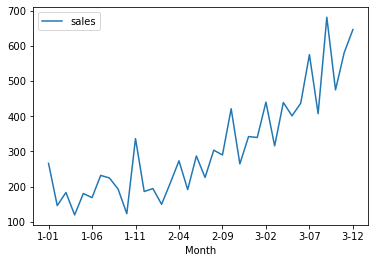

In [16]:
series.plot()

In [17]:
# also called as smoothing
moving_average_series=series.rolling(window=5).mean()  # window: This is the number of observations used for calculating the statistic. 

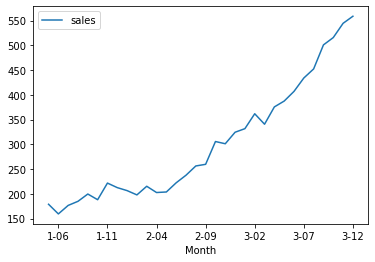

In [18]:
moving_average_series.plot()

In [19]:
moving_average_series.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 1-01 to 3-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sales   32 non-null     float64
dtypes: float64(1)
memory usage: 576.0+ bytes


In [20]:
moving_average_series.describe()

,sales
count,32.000000
mean,301.979375
std,119.684206
min,159.420000
25%,203.445000
50%,257.920000
75%,378.470000
max,558.620000


In [21]:
sm.stats.durbin_watson(series) # very less correlation

array([0.09548538])

In [22]:
train = series[:30]

In [23]:
##train = np.array(train)

In [62]:
test = series[30:]

In [172]:
arima = ARIMA(train, order = (5,2,3))

/home/kavish/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/home/kavish/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [173]:
%time
model = arima.fit(maxiter=500)

CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 12.2 µs


In [174]:
model.aic

329.23104723485244

In [175]:
pred= model.forecast(steps=6)[0] ## Forcasting for 6 new steps

In [176]:
pred

array([474.50205621, 504.35149124, 536.65936007, 541.99986378,
       595.17497511, 615.83882465])

In [183]:
from sklearn.metrics import mean_squared_error

In [184]:
np.sqrt(mean_squared_error(test,pred))

87.8365154700704

We have got preety good performance from Arima mode;.
#### Thanks!!